# Bank Telemarketing prediction

## Problem Statement

Using data on social economic indicators, bank client data, telemarketing campaign data, contact to find the best machine learning model that can predict whether a customer will purchase a term deposit i.e fixed deposit at different economic levels.

This is to help the bank sales people target customers during different economic levels and time periods of the year and determine who have a higher probability to purchase the bank's product and hence increase bank's sales revenue

The accuracy and recall score from different machine-learning models will be compared and used to evaluate to find the best model for production and prediction.

 Ordered by date (from May 2008 to November 2010)
 
## Input variables:

   ## bank client data:
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   
   ## related to current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
  
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
   ## related to before current campaign:
  
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
  
   ## social and economic context attributes
   
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)   
  
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)   
  
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  
  20 - nr.employed: number of employees - quarterly indicator (numeric)
  
   ## target variable
   
  21 - y: has the client subscribed a term deposit? (binary: 'yes','no')

# # 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Dataset

## 2.1.  Full bank dataset aka train data

In [2]:
bank_af= pd.read_csv('../dataset/bank-additional-full.csv', sep = ';')

In [3]:
bank_af.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank_af.shape

(41188, 21)

The dataset contains 20 features regarding the information of over 41,000 bank clients that were contacted, economic indicators and bank marketing efforts.

In [5]:
bank_af.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
bank_af.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The dataset contains no null values and the data types look correct.

In [7]:
bank_af.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


The minimum and maximum age of the clients are 17 and 98 with a mean of about 40 years old. The min and max ages are abit extreme and might be outliers.

The minimum and maximum duration of phone calls (duration) are 0 and 4918 seconds (81 mins) with a mean of about 258 seconds (4.3 mins). The 0 second calls are too short for any conversation and should have no successful transactions. The 81 mins phone call should be an outlier. The mean of 4.3 mins is also too short to make a successful sale.

The minimum and maximum number of contacts for present compaign (campaign) are 1 and 56 contacts with a mean of about 2.5 contacts.

The minimum and maximum number of days passed after the client was contacted since the last campaign (pdays) are 0 and 999 days with a mean of about 962 days.  This feature would need some cleaning as 999  means the client was not previously contacted and the high number would skew the analysis.

The minimum and maximum number of contacts performed before this campaign (previous) are 0 and 7 days with a mean of about 0.2 days.

The minimum and maximum of national employment variation rate (emp.var.rate) are -3.4 and 1.4 with a mean of about 0.08. The negative values are expected as they indicate a decrease in employment rate.

The minimum and maximum  of comsumer price index (cons.price.idx)are 94.76 and 92.2 with a mean of about 93.57. 

The minimum and maximum of comsumer confidence index (cons.conf.idx) are -50.80 and -26.90 with a mean of about -40.50. The negative values are expected as they indicate the consumer confidence to be pessimistic about the economy.

The minimum and maximum of 3 month Euribor rate (euribor3m) are 0.63 and 5.05 with a mean of about 3.62. 

The minimum and maximum of national number of people employed (nr.employed) are 4963.60 and 5228.10 with a mean of about 5167.04


In [8]:
for i in bank_af.columns:
  print(i)
  print(bank_af[i].unique())
  print('---'*40)

age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
------------------------------------------------------------------------------------------------------------------------
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
------------------------------------------------------------------------------------------------------------------------
marital
['married' 'single' 'divorced' 'unknown']
------------------------------------------------------------------------------------------------------------------------
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
-----------------------------------------------------------------

There are unknown values for the features: job, marital, default, housing, loan. 

Poutcome has values 'nonexistent' which means those customers were not contacted during the last campaign.

From the feature 'month', it shows that during Jan and Feb, there were no calls made.

From the feature 'day_of_week', it shows that calls were only made during the week days.

The values of 'yes' and 'no' for feature y, the target variable, should be changed to 0 and 1 for easier analysis and modelling.

###  1.1 Changing values for feature 'y' to 0 and 1

In [9]:
bank_af.y = bank_af.y.apply(lambda x: 0 if x=='no' else 1)

In [10]:
bank_af.y.value_counts(normalize= True)

0    0.887346
1    0.112654
Name: y, dtype: float64

The value counts show that the data is imbalanced with 89% as negative class and 11% as positive class. It also indicates the success rate of the bank's telemarketing efforts. The success rate of 11% follows the global success rate of telemarketing campaigns (https://smallbusiness.chron.com/average-success-rate-direct-marketing-73648.html)

## 2 Data Cleaning

### 2.1 Check for null values

In [11]:

bank_af.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

No null values

### 2.2 Check for duplicates

In [12]:
dup =bank_af[bank_af.duplicated(keep = 'last')]
dup.shape

(12, 21)

There are 12 duplicates. Although it is possible that the duplicates may be different customers but as the values of the features are all the same, the duplicated data does not add information and should be dropped

In [13]:
#drop duplicates
bank_af = bank_af.drop_duplicates()

bank_af.shape

(41176, 21)

### 2.3 Checking whether values that are vague i.e nonexistent, unknown etc should be dropped, encoded differently or feature engineering needs to be done

In [14]:
pd.crosstab(bank_af.pdays, bank_af.y,normalize =True)

y,0,1
pdays,,
0,0.000121,0.000243
1,0.000437,0.000194
2,0.000583,0.000899
3,0.003424,0.007237
4,0.001336,0.001530
5,0.000413,0.000704
6,0.002987,0.007019
7,0.000486,0.000971
8,0.000146,0.000291


As seen above the value 999 in the feature pdays comprises a high proportion of the data. The feature should not be dropped and will be feature engineered to make it easier to model.

### 2.4 Checking unknown values

In [15]:
pd.crosstab(bank_af.job, bank_af.y,normalize =True)

y,0,1
job,,
admin.,0.220225,0.032810
blue-collar,0.209224,0.015494
entrepreneur,0.032349,0.003011
housemaid,0.023169,0.002574
management,0.063046,0.007966
retired,0.031183,0.010540
self-employed,0.030892,0.003619
services,0.088498,0.007844
student,0.014572,0.006679


The proportion of unknown values for job is small and should be dropped to make the data less noisy.

In [16]:
#dropping unknown values

bank_af=bank_af[bank_af.job !='unknown'] 

In [17]:
#checking that unknown values have been dropped
bank_af.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

In [18]:
pd.crosstab(bank_af.marital, bank_af.y,normalize =True)

y,0,1
marital,,
divorced,0.100989,0.011580
married,0.542819,0.061573
single,0.242007,0.039294
unknown,0.001518,0.000220


The proportion of unknown values for marital is small and should be dropped to make the data less noisy.

In [19]:
#dropping unknown values
bank_af=bank_af[bank_af.marital !='unknown'] 

In [20]:
#checking that unknown values have been dropped
bank_af.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

In [21]:
pd.crosstab(bank_af.default, bank_af.y,normalize =True)

y,0,1
default,,
no,0.691110,0.101950
unknown,0.196174,0.010693
yes,0.000074,0.000000


The proportion of unknown values for default is large and will be kept unchanged.



In [22]:
pd.crosstab(bank_af.housing, bank_af.y,normalize =True)

y,0,1
housing,,
no,0.402624,0.049123
unknown,0.021508,0.002624
yes,0.463225,0.060895


The proportion of unknown values for housing is small and should be dropped to make the data less noisy.

In [23]:
#dropping unknown values
bank_af=bank_af[bank_af.housing !='unknown'] 

In [24]:
#checking that unknown values have been dropped
bank_af.housing.unique()

array(['no', 'yes'], dtype=object)

In [25]:
pd.crosstab(bank_af.loan, bank_af.y,normalize =True)

y,0,1
loan,,
no,0.748913,0.095700
yes,0.138348,0.017039


The proportion of unknown values for loan is small and should be dropped to make the data less noisy.

In [26]:
#dropping unknown values
bank_af=bank_af[bank_af.loan !='unknown'] 

In [27]:
#checking that unknown values have been dropped
bank_af.loan.unique()

array(['no', 'yes'], dtype=object)

In [28]:
pd.crosstab(bank_af.education, bank_af.y,normalize =True)

y,0,1
education,,
basic.4y,0.090221,0.010354
basic.6y,0.050841,0.004524
basic.9y,0.135684,0.011485
high.school,0.206931,0.025307
illiterate,0.000352,0.000101
professional.course,0.113568,0.014526
university.degree,0.256289,0.040688
unknown,0.033374,0.005755


The proportion of unknown values for education is small and should be dropped to make the data less noisy.

In [29]:
#dropping unknown values
bank_af=bank_af[bank_af.education !='unknown'] 

In [30]:
#checking that unknown values have been dropped
bank_af.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'university.degree', 'illiterate'],
      dtype=object)

## 3. Exploratory Data Analysis

C:\Users\Willlin\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Willlin\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Willlin\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


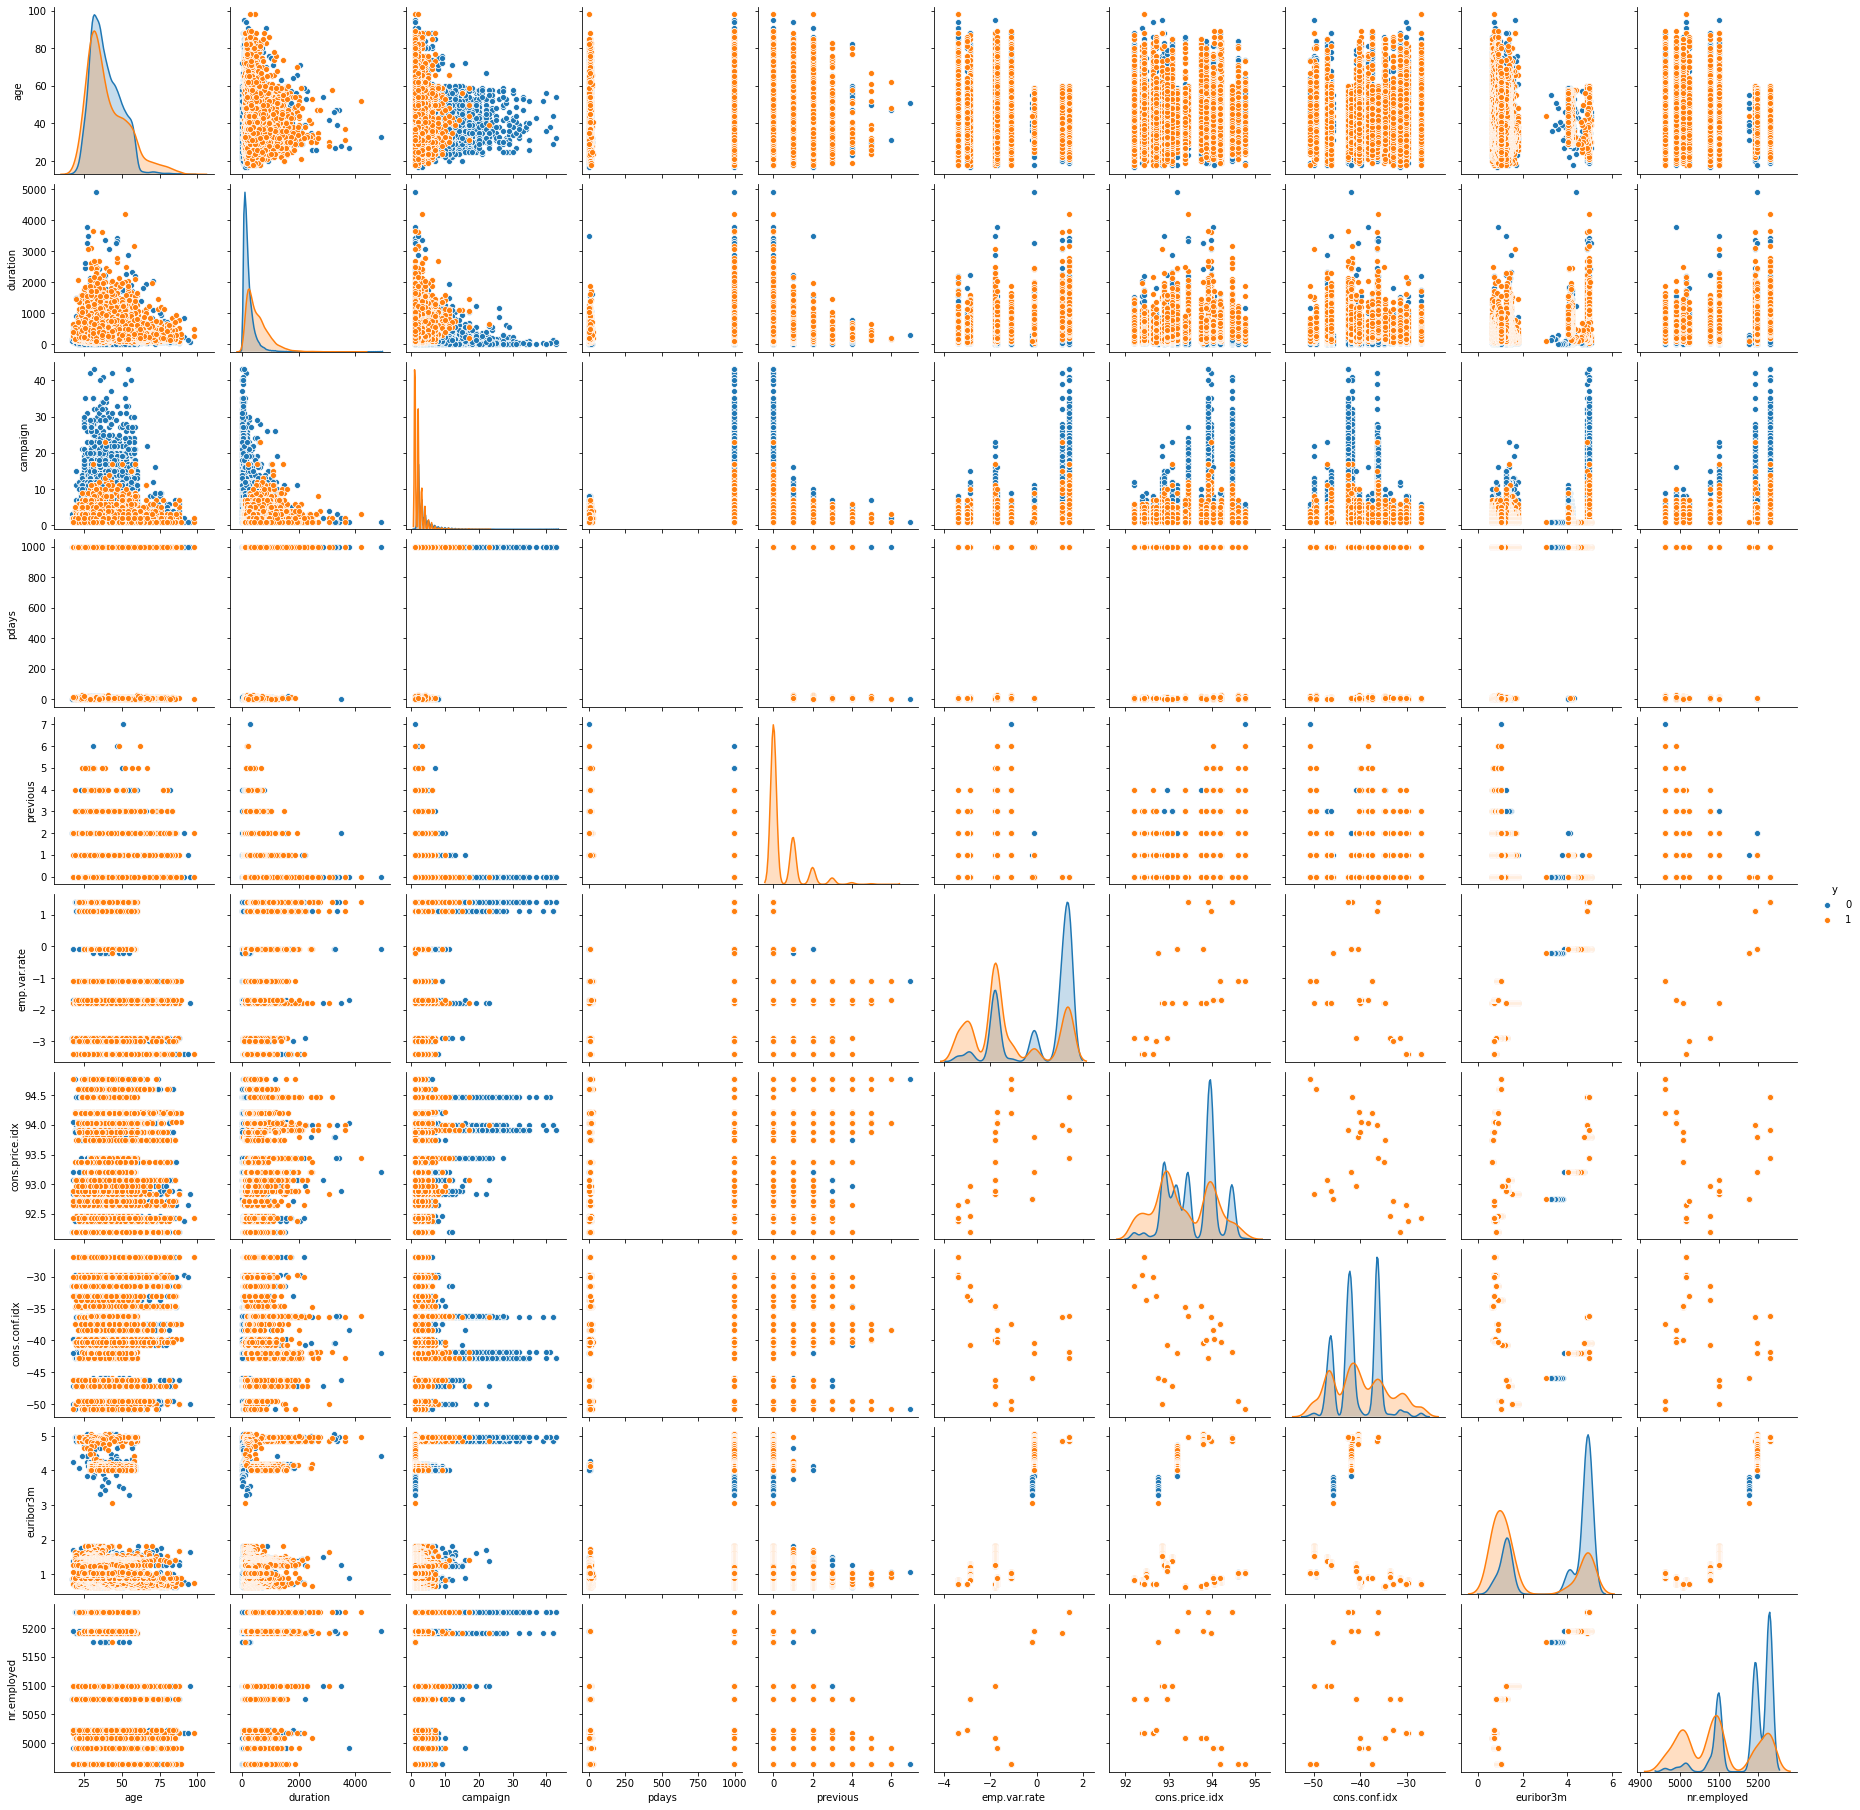

In [31]:
sns.pairplot(bank_af, hue ='y');

The above pairplot shows a slight positive correlation between the number of employed and the rest of the economic indicators i.e euribor3m, employment variation rate. This makes sense as the better the econonmy is doing the more number of people should be employed

### 3.1 Data before current campaign

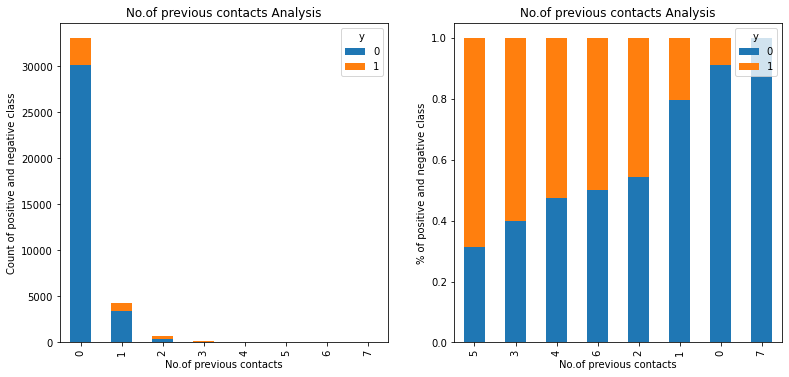

In [32]:
ax=plt.subplot(331)
pd.crosstab(bank_af.previous, bank_af.y).sort_values(by=1,ascending=False).plot(kind='bar', ax=ax,figsize=(20,20),stacked=True)
plt.title('No.of previous contacts Analysis')
plt.xlabel('No.of previous contacts')
plt.ylabel('Count of positive and negative class')

ax= plt.subplot(332)
pd.crosstab(bank_af.previous, bank_af.y,normalize='index').sort_values(by=1,ascending=False).plot(kind='bar', ax=ax,figsize=(20,20),stacked=True)
plt.title('No.of previous contacts Analysis')
plt.xlabel('No.of previous contacts')
plt.ylabel('% of positive and negative class');


The above count of classes bar graph shows that the majority of clients contacted were not contacted before this campaign. It looks like there might be outliers beyond 3 contacts. 

The percentage of classes bar graph shows that the more times the client was contacted before the current campaign, the more likely they would purchase the product in the current campaign.

Although no client bought at 7 contacts, this could be due to the small number of clients contacted 7 times. 


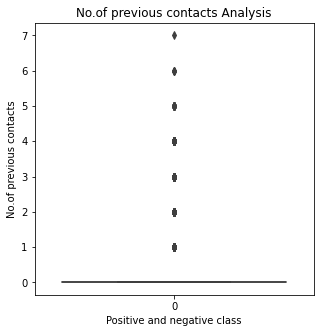

In [33]:
plt.figure(figsize=(5,5))
sns.boxplot(data= bank_af.previous)
plt.title('No.of previous contacts Analysis')
plt.xlabel('Positive and negative class')

plt.ylabel('No.of previous contacts');

The above bargraph shows that the outliers  are beyond the clients contacted more than 1 time. These outliers will be dropped as they would not provide much information.

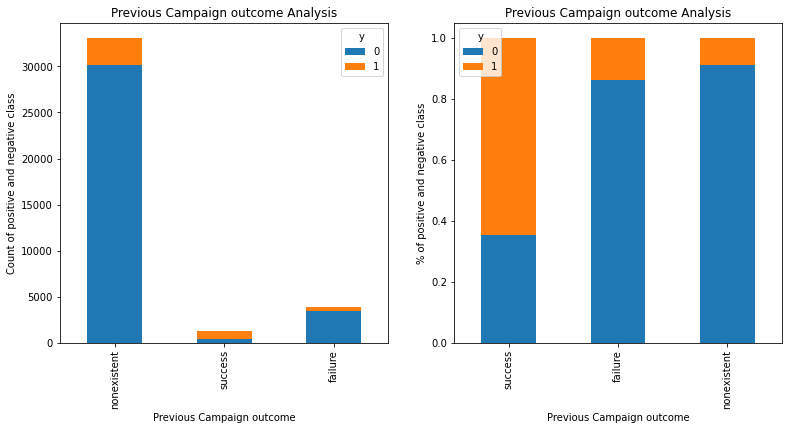

In [34]:
ax=plt.subplot(331)
pd.crosstab(bank_af.poutcome, bank_af.y).sort_values(by=1,ascending=False).plot(kind='bar', ax=ax,figsize=(20,20),stacked=True)
plt.title('Previous Campaign outcome Analysis')
plt.xlabel('Previous Campaign outcome')
plt.ylabel('Count of positive and negative class')

ax= plt.subplot(332)
pd.crosstab(bank_af.poutcome, bank_af.y,normalize='index').sort_values(by=1,ascending=False).plot(kind='bar', ax=ax,figsize=(20,20),stacked=True)
plt.title('Previous Campaign outcome Analysis')
plt.xlabel('Previous Campaign outcome')
plt.ylabel('% of positive and negative class');

The above count of classes bar graph shows that the majority of clients contacted were not contacted before this campaign hence the outcome of nonexistent is high. 

The percentage of classes bar graph shows that if the outcome of the previous campaign was successful, the more likely they would purchase the product. This makes sense as the client has bought a product from the bank previously and would likely trust another product from the same bank. 


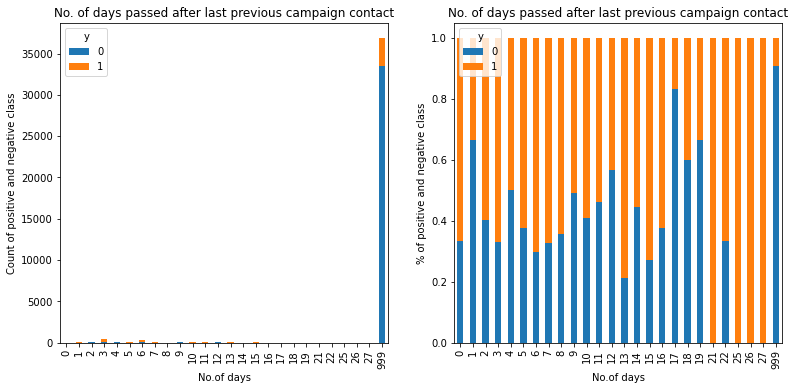

In [35]:
ax= plt.subplot(331)
pd.crosstab(bank_af.pdays, bank_af.y).plot(kind='bar', ax=ax,figsize=(20,20),stacked=True)
plt.title('No. of days passed after last previous campaign contact')
plt.xlabel('No.of days')
plt.ylabel('Count of positive and negative class')

ax=plt.subplot(332)
pd.crosstab(bank_af.pdays, bank_af.y,normalize='index').plot(kind='bar', ax=ax,figsize=(20,20),stacked=True)
plt.title('No. of days passed after last previous campaign contact')
plt.xlabel('No.of days')
plt.ylabel('% of positive and negative class');

The above count of classes bar graph shows that the majority of clients contacted were not contacted before this campaign (999 means client was not previously contacted.

The percentage of classes bar graph does not show any strong trend with purchase of product and the number of days that passed by after the client was last contacted from a previous campaign.

This feature will be engineered to be a categorical feature instead for easier modeling e.g all values 999 will be changed to 'new clients' and the rest of the values will be grouped.

### 3.2 Data related to current campaign

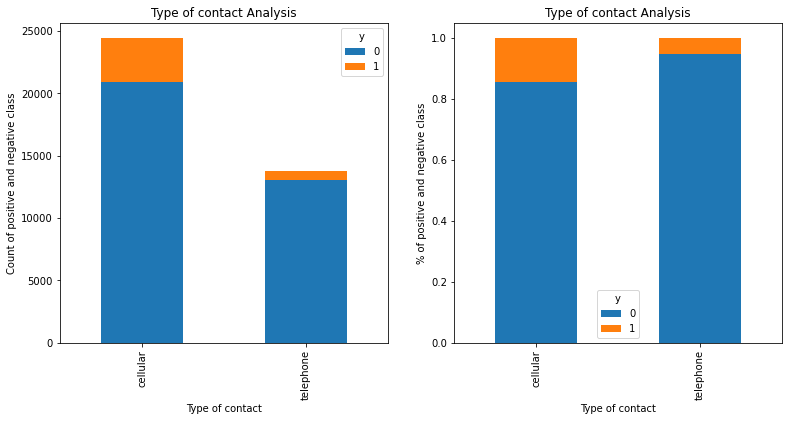

In [36]:
ax= plt.subplot(331)
pd.crosstab(bank_af.contact, bank_af.y).sort_values(by=1,ascending=False).plot(kind='bar', ax=ax,figsize=(20,20),stacked=True)
plt.title('Type of contact Analysis')
plt.xlabel('Type of contact')
plt.ylabel('Count of positive and negative class')

ax=plt.subplot(332)
pd.crosstab(bank_af.contact, bank_af.y,normalize='index').sort_values(by=1,ascending=False).plot(kind='bar', ax=ax,figsize=(20,20),stacked=True)
plt.title('Type of contact Analysis')
plt.xlabel('Type of contact')
plt.ylabel('% of positive and negative class');

The above count of classes bar graph shows that for the clients contacted there is a majority who were contacted via cellular phones instead of telephone.

The percentage of classes bar graph shows that clients contacted via cellular would likely purchase the product.

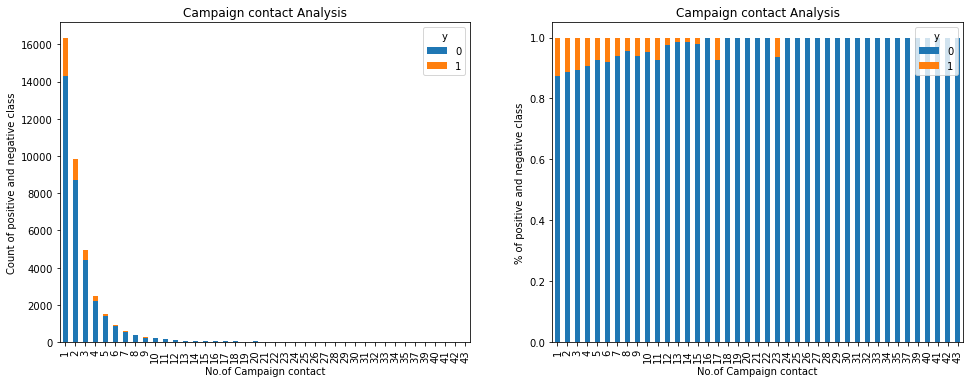

In [37]:
ax= plt.subplot(331)
pd.crosstab(bank_af.campaign, bank_af.y).plot(kind='bar', ax=ax,figsize=(20,20),stacked=True)
plt.title('Campaign contact Analysis')
plt.xlabel('No.of Campaign contact')
plt.ylabel('Count of positive and negative class')

ax=plt.subplot(332)
pd.crosstab(bank_af.campaign, bank_af.y,normalize='index').plot(kind='bar', ax=ax,figsize=(25,20),stacked=True)
plt.title('Campaign contact Analysis')
plt.xlabel('No.of Campaign contact')
plt.ylabel('% of positive and negative class');

he above count of classes bar graph shows that the majority of clients were contacted 1-2 times for this campaign. The number of contacts is more for this campaign than the previous campaign and seems excessive as some clients were contacted more than 20 times.

The percentage of classes bar graph shows that the less times the client is contacted the more likley they would purchase the product, this makes sense as the client has already heard about the product previously and if they wanted it, would have purchased it initially. The reason why clients are purchasing in later contacts although in diminishing numbers could be due to a change in their decision, circumstances or persuasiveness of different telemarketers. 

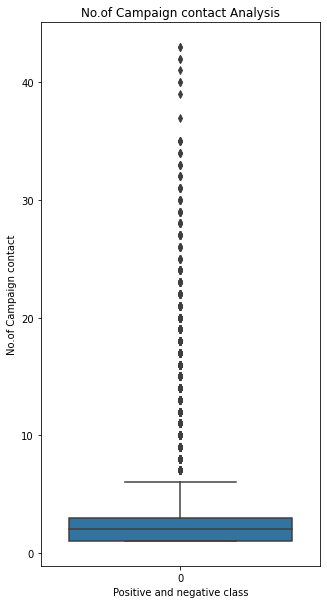

In [38]:
plt.figure(figsize=(5,10))
sns.boxplot(data= bank_af.campaign)
plt.title('No.of Campaign contact Analysis')
plt.xlabel('Positive and negative class')
plt.ylabel('No.of Campaign contact');


The above boxplot shows that there are outliers for the negative class beyond 6 contacts. These outliers will be dropped.

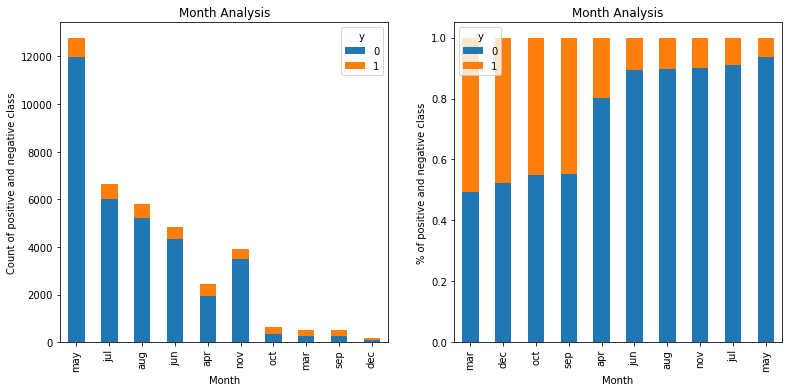

In [39]:
ax= plt.subplot(331)
pd.crosstab(bank_af.month, bank_af.y).sort_values(by=1,ascending=False).plot(kind='bar', ax=ax,figsize=(20,20),stacked=True)
plt.title('Month Analysis')
plt.xlabel('Month')
plt.ylabel('Count of positive and negative class')

ax=plt.subplot(332)
pd.crosstab(bank_af.month, bank_af.y,normalize='index').sort_values(by=1,ascending=False).plot(kind='bar', ax=ax,figsize=(20,20),stacked=True)
plt.title('Month Analysis')
plt.xlabel('Month')
plt.ylabel('% of positive and negative class');

The above count of classes bar graph shows that for the clients were contacted the most in May and least in Dec. The low number of calls in Dec could be due to the staff or clients on holiday. It is interesting that May has the most number of calls made, it could be that May was the start of the campaign.

The percentage of classes bar graph shows that clients contacted in Mar, Dec, Sep, Oct and Apr would be more likely to purchase compared to other months. However, those are the months with lower call volumes and may not be represent a trend.

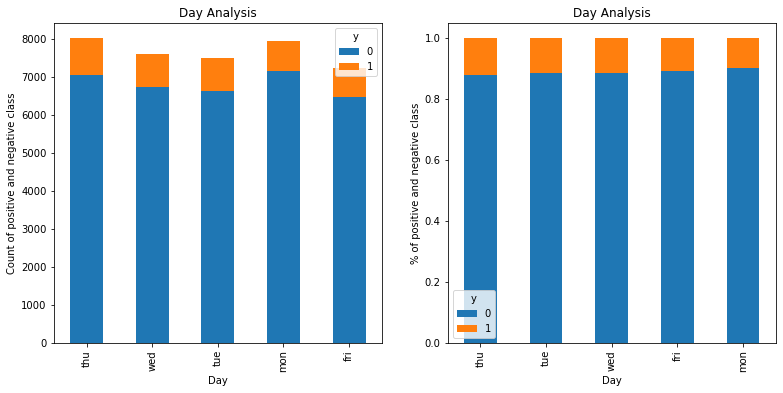

In [40]:
ax= plt.subplot(331)
pd.crosstab(bank_af.day_of_week, bank_af.y).sort_values(by=1,ascending=False).plot(kind='bar', ax=ax,figsize=(20,20),stacked=True)
plt.title('Day Analysis')
plt.xlabel('Day')
plt.ylabel('Count of positive and negative class')

ax=plt.subplot(332)
pd.crosstab(bank_af.day_of_week, bank_af.y,normalize='index').sort_values(by=1,ascending=False).plot(kind='bar', ax=ax,figsize=(20,20),stacked=True)
plt.title('Day Analysis')
plt.xlabel('Day')
plt.ylabel('% of positive and negative class');

The above count of classes bar graph shows that for the clients were contacted slightly more on Thurs and Mon than the rest of the days with Friday the least no.of calls made. This could be due to the staff or clients being more available on Mon and staff rushing to make calls before Fri, the last day of the week. The low Fri numbers is likely due to both staff and client being less available during the last day of the week.

The percentage of classes bar graph shows that clients contacted during the week shows almost no difference in likelihood of purchase.

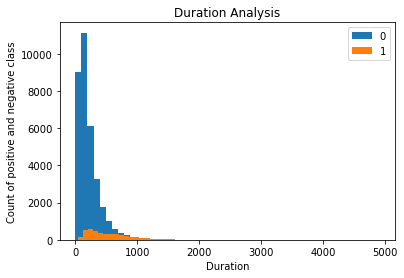

In [41]:
plt.title('Duration Analysis')
plt.xlabel('Duration')
plt.ylabel('Count of positive and negative class')
plt.hist(bank_af.groupby("y").get_group(0)['duration'], bins=50, label= '0')
plt.hist(bank_af.groupby("y").get_group(1)['duration'], bins=50, label='1')
plt.legend();

The above plot shows that duration has quite abit of outliers with majority of the calls are less than 1000 seconds. This makes sense as calls beyond 1000 seconds means the call has lasted more than 16 mins which is too long a conversation.

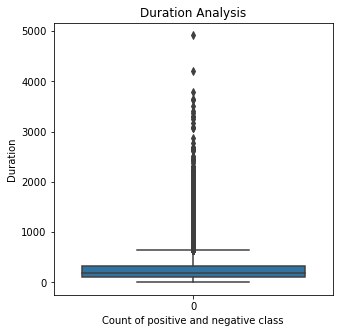

In [42]:
plt.figure(figsize=(5,5))
sns.boxplot(data= bank_af.duration)
plt.title('Duration Analysis')
plt.xlabel('Count of positive and negative class')
plt.ylabel('Duration');

In [43]:
Q1 = bank_af['duration'].quantile(0.25)
Q3 = bank_af['duration'].quantile(0.75)
IQR = Q3 - Q1
MAX=Q3 + 1.5*IQR
MAX

644.5

As shown in the above boxplot, the outliers start from 645 seconds onwards. These outliers will be dropped.

### 3.3 Bank Client Data

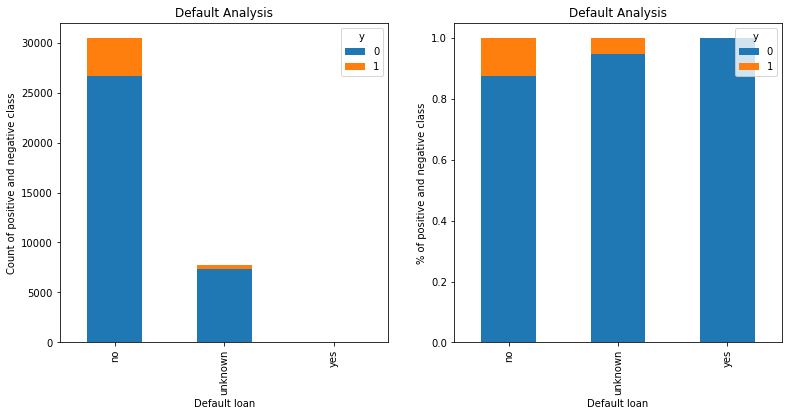

In [44]:
ax= plt.subplot(331)
pd.crosstab(bank_af.default, bank_af.y).sort_values(by=1,ascending=False).plot(kind='bar', ax=ax,figsize=(20,20),stacked=True)
plt.title('Default Analysis')
plt.xlabel('Default loan')
plt.ylabel('Count of positive and negative class')

ax=plt.subplot(332)
pd.crosstab(bank_af.default, bank_af.y,normalize='index').sort_values(by=1,ascending=False).plot(kind='bar', ax=ax,figsize=(20,20),stacked=True)
plt.title('Default Analysis')
plt.xlabel('Default loan')
plt.ylabel('% of positive and negative class');


The above count of classes bar graph shows that for the clients contacted there is a higher number who never defaulted.


The percentage of classes bar graph shows that clients who defaulted would likely purchase the product than those who never dafaulted, this makes sense as clients who defaulted would likely not have sufficient funds to purchase a product.


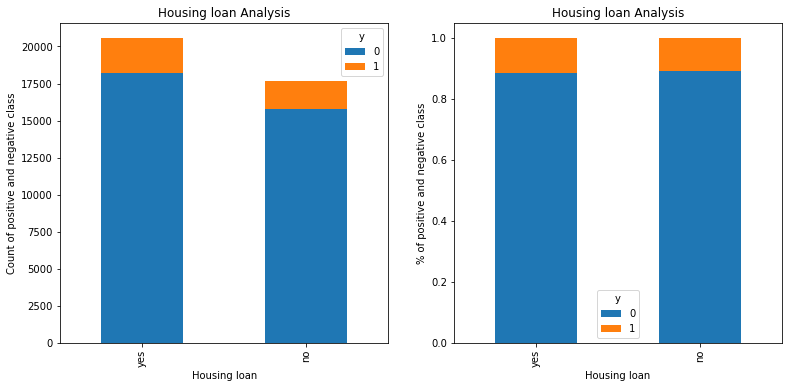

In [45]:
ax= plt.subplot(331)
pd.crosstab(bank_af.housing, bank_af.y).sort_values(by=1,ascending=False).plot(kind='bar', ax=ax,figsize=(20,20),stacked=True)
plt.title('Housing loan Analysis')
plt.xlabel('Housing loan')
plt.ylabel('Count of positive and negative class')

ax=plt.subplot(332)
pd.crosstab(bank_af.housing, bank_af.y,normalize='index').sort_values(by=1,ascending=False).plot(kind='bar', ax=ax,figsize=(20,20),stacked=True)
plt.title('Housing loan Analysis')
plt.xlabel('Housing loan')
plt.ylabel('% of positive and negative class');

The above count of classes bar graph shows that for the clients contacted there is a slightly higher number who had housing loans than those that do not.


The percentage of classes bar graph shows that between the 2 groups of clients who have and do not have housing loans, the probability of purchasing the product is almost equal.


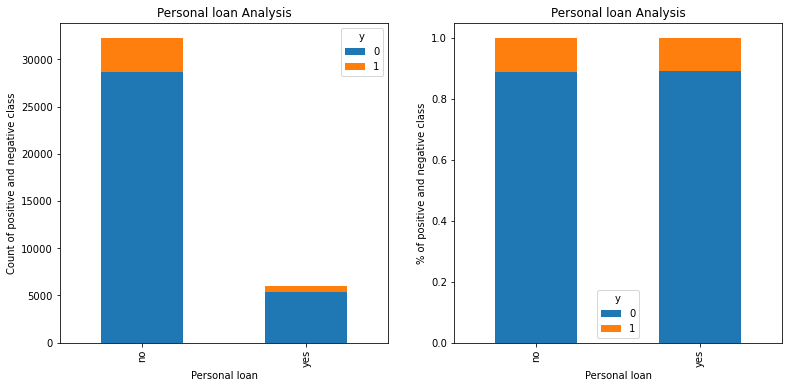

In [46]:
ax= plt.subplot(331)
pd.crosstab(bank_af.loan, bank_af.y).sort_values(by=1,ascending=False).plot(kind='bar', ax=ax,figsize=(20,20),stacked=True)
plt.title('Personal loan Analysis')
plt.xlabel('Personal loan')
plt.ylabel('Count of positive and negative class')

ax=plt.subplot(332)
pd.crosstab(bank_af.loan, bank_af.y,normalize='index').sort_values(by=1,ascending=False).plot(kind='bar', ax=ax,figsize=(20,20),stacked=True)
plt.title('Personal loan Analysis')
plt.xlabel('Personal loan')
plt.ylabel('% of positive and negative class');

The above count of classes bar graph shows that for the clients contacted there is a majority who do not have personal loans than those that do.


The percentage of classes bar graph shows that between the 2 groups of clients who have and do not have personal loans, the probability of purchasing the product is almost equal. This is interesting as it follows the same trend as housing loans.

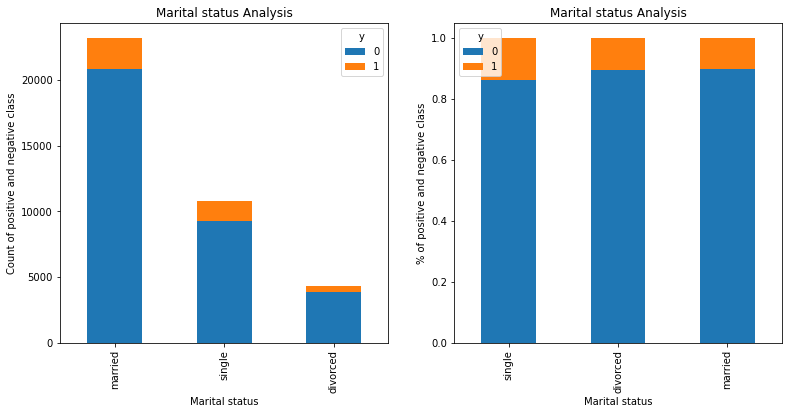

In [47]:
ax= plt.subplot(331)
pd.crosstab(bank_af.marital, bank_af.y).sort_values(by=1,ascending=False).plot(kind='bar', ax=ax,figsize=(20,20),stacked=True)
plt.title('Marital status Analysis')
plt.xlabel('Marital status')
plt.ylabel('Count of positive and negative class')

ax=plt.subplot(332)
pd.crosstab(bank_af.marital, bank_af.y,normalize='index').sort_values(by=1,ascending=False).plot(kind='bar', ax=ax,figsize=(20,20),stacked=True)
plt.title('Marital status Analysis')
plt.xlabel('Marital status')
plt.ylabel('% of positive and negative class');

The above count of classes bar graph shows that for the clients were contacted were mostly married, followed by single and divorced

The percentage of classes bar graph shows that clients that were single were slightly more likely to purchase a product while clients that were divorced or married were less likely to purchase by about the same level. This makes sense as people who are divorced or married may have other financial priorities.

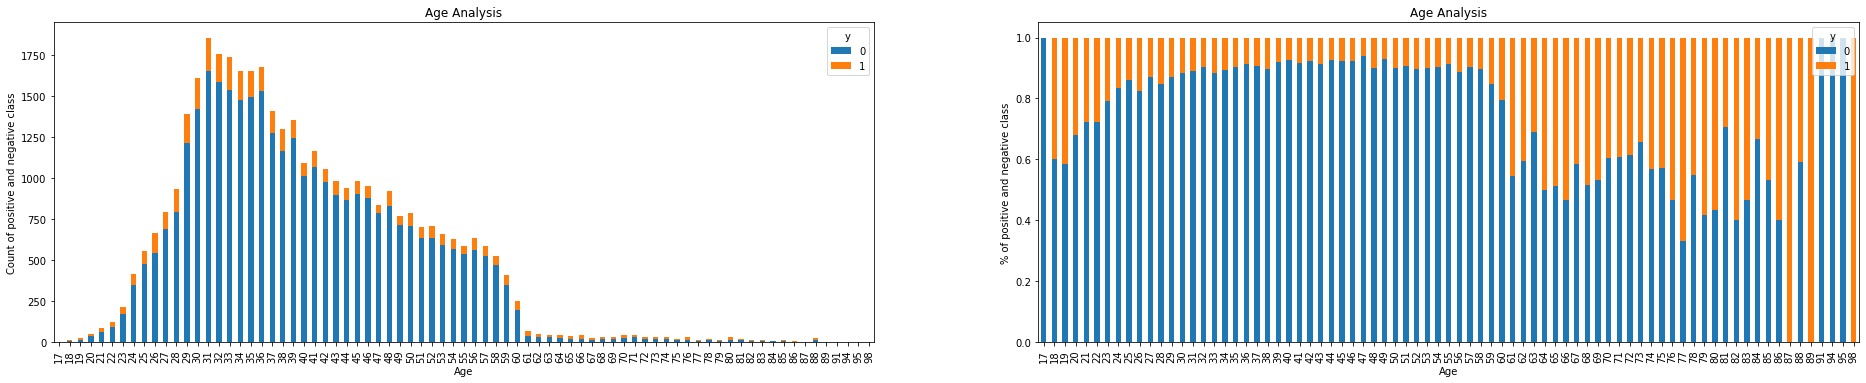

In [48]:
ax= plt.subplot(331)
pd.crosstab(bank_af.age, bank_af.y).plot(kind='bar', ax=ax,figsize=(50,20),stacked=True)
plt.title('Age Analysis')
plt.xlabel('Age')
plt.ylabel('Count of positive and negative class')

ax= plt.subplot(332)
pd.crosstab(bank_af.age, bank_af.y,normalize='index').plot(kind='bar', ax=ax,figsize=(50,20),stacked=True);
plt.title('Age Analysis')
plt.xlabel('Age')
plt.ylabel('% of positive and negative class');

The above count of classes bar graph shows that for the clients were contacted were mostly between the ages of 23 - 60.

The percentage of classes bar graph shows that clients age 60 and above are more likely to purchase a product, this makes sense as term deposits are products with low yield and low risk. Clients who are younger would prefer to riskier products with higher returns.

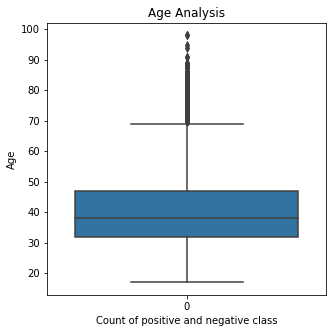

In [49]:
plt.figure(figsize=(5,5))
sns.boxplot(data= bank_af.age)
plt.title('Age Analysis')
plt.xlabel('Count of positive and negative class')
plt.ylabel('Age');

The outliers start from age 70 and above, these outliers will be dropped.

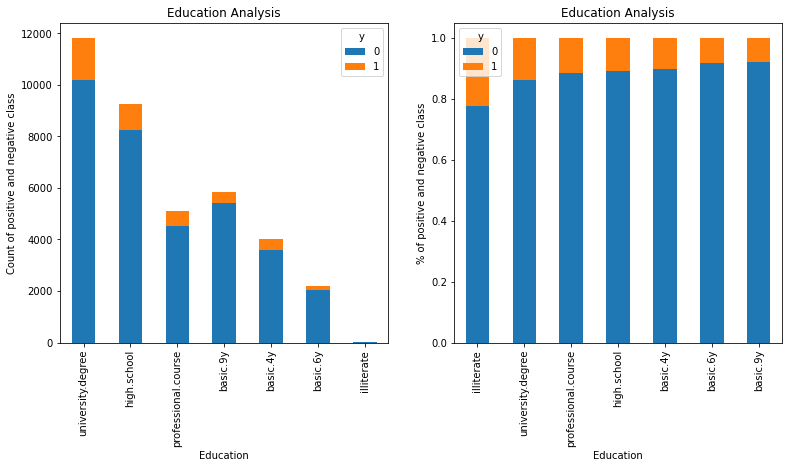

In [50]:
ax= plt.subplot(331)
pd.crosstab(bank_af.education, bank_af.y).sort_values(by=1,ascending=False).plot(kind='bar', ax=ax,figsize=(20,20),stacked=True)
plt.title('Education Analysis')
plt.xlabel('Education')
plt.ylabel('Count of positive and negative class')

ax=plt.subplot(332)
pd.crosstab(bank_af.education, bank_af.y,normalize='index').sort_values(by=1,ascending=False).plot(kind='bar', ax=ax,figsize=(20,20),stacked=True)
plt.title('Education Analysis')
plt.xlabel('Education')
plt.ylabel('% of positive and negative class');

The above count of classes bar graph shows that for the clients were contacted mostly have degrees with clients who are illiterate contacted the least.

The percentage of classes bar graph shows that clients were illiterate are more likely to purchase a product, however as the number of illiterate clients are small, this may not be a trend. Clients who have degrees are slightly more likely than the other educational levels to purchase a product, this makes sense as people with degrees tend to have higher income than the other educational levels and hence more disposable income to purchase the products.

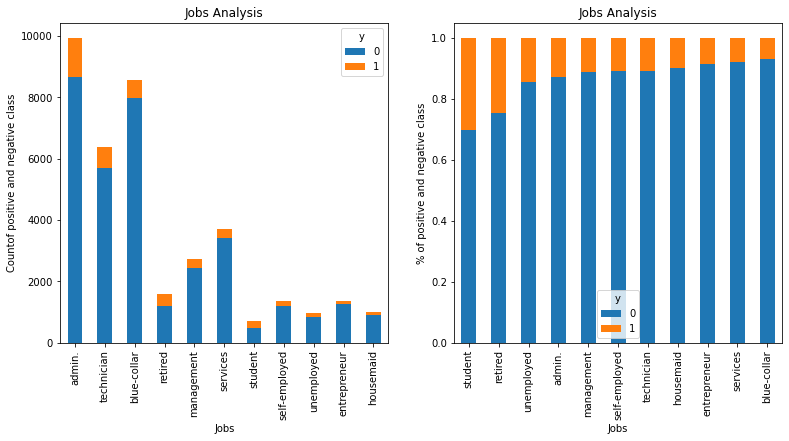

In [51]:
ax= plt.subplot(331)
pd.crosstab(bank_af.job, bank_af.y).sort_values(by=1,ascending=False).plot(kind='bar', ax=ax,figsize=(20,20),stacked=True)
plt.title('Jobs Analysis')
plt.xlabel('Jobs')
plt.ylabel('Countof positive and negative class')

ax=plt.subplot(332)
pd.crosstab(bank_af.job, bank_af.y,normalize='index').sort_values(by=1,ascending=False).plot(kind='bar', ax=ax,figsize=(20,20),stacked=True)
plt.title('Jobs Analysis')
plt.xlabel('Jobs')
plt.ylabel('% of positive and negative class');

The above count of classes bar graph shows that for the clients were contacted mostly have admin jobs with students contacted the least.

The percentage of classes bar graph shows that clients were students are more likely to purchase a product, however as the number of students are small, this may not be a trend. Clients who are retired are slightly more likely than the other jobs to purchase a product, this makes sense as people retired tend to have more disposable income and also who are older and less risk adverse.

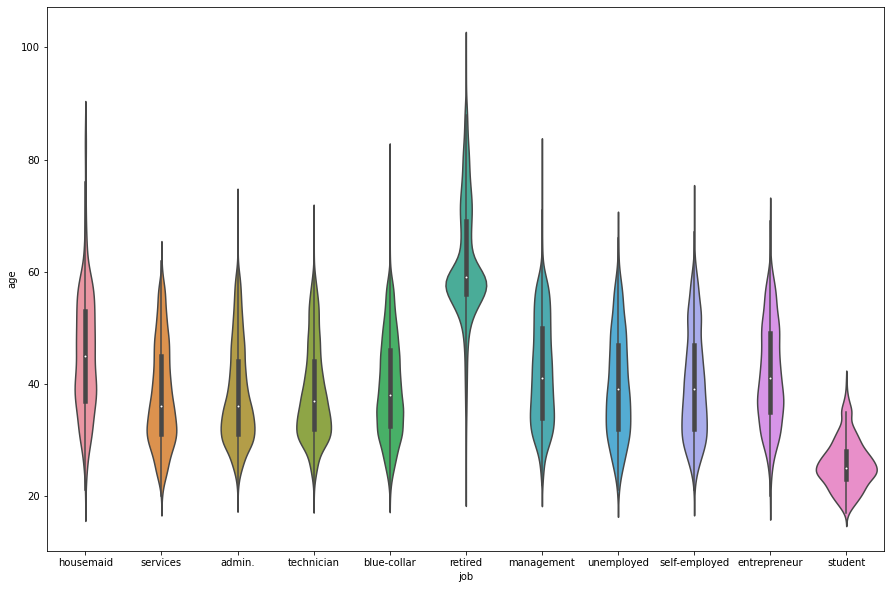

In [52]:
plt.figure(figsize=(15,10))
sns.violinplot(x= 'job', y='age', data=bank_af);

The above violinplot shows that people who are older, around 60 and above are retired.

### 3.4 Economic indicators data

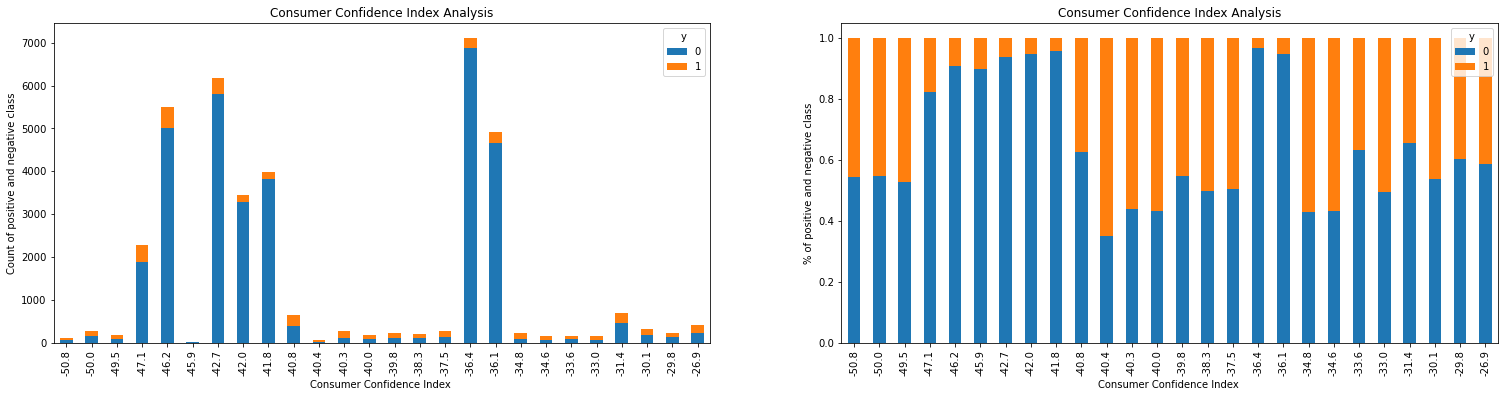

In [53]:
ax= plt.subplot(331)
pd.crosstab(bank_af['cons.conf.idx'], bank_af.y).plot(kind='bar', ax=ax,figsize=(40,20),stacked=True)
plt.title('Consumer Confidence Index Analysis')
plt.xlabel('Consumer Confidence Index ')
plt.ylabel('Count of positive and negative class')

ax=plt.subplot(332)
pd.crosstab(bank_af['cons.conf.idx'], bank_af.y,normalize='index').plot(kind='bar', ax=ax,figsize=(40,20),stacked=True)
plt.title('Consumer Confidence Index Analysis')
plt.xlabel('Consumer Confidence Index ')
plt.ylabel('% of positive and negative class');

The above count of classes bar graph shows that for the clients were contacted mostly contacted when the consumer confidence index is between -47.1 to -41.8 and -36.4 to -36.1. This graph is interesting as during the campaign period, consumers were not very confident of the economy.

The percentage of classes bar graph shows that there is not consumer confidence index trend  where clients would be more likely to purchase. This is surprising as a trend of higher likelihood of purchase should follow when consumer confidence increases.

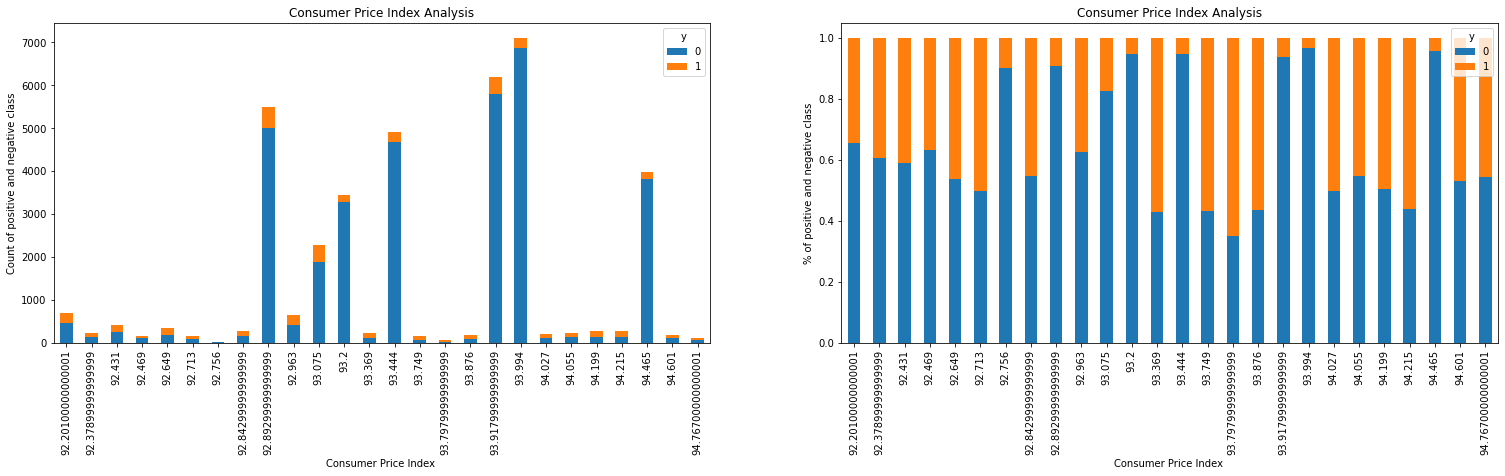

In [54]:
ax= plt.subplot(331)
pd.crosstab(bank_af['cons.price.idx'], bank_af.y).plot(kind='bar', ax=ax,figsize=(40,20),stacked=True)
plt.title('Consumer Price Index Analysis')
plt.xlabel('Consumer Price Index ')
plt.ylabel('Count of positive and negative class')

ax=plt.subplot(332)
pd.crosstab(bank_af['cons.price.idx'], bank_af.y,normalize='index').plot(kind='bar', ax=ax,figsize=(40,20),stacked=True)
plt.title('Consumer Price Index Analysis')
plt.xlabel('Consumer Price Index ')
plt.ylabel('% of positive and negative class');

The above count of classes bar graph shows that for the clients were contacted mostly contacted when the consumer confidence index was between 92.89,93.92 and 93.99.

The percentage of classes bar graph shows that there is not consumer price index trend  where clients would be more likely to purchase. This is surprising as a trend of higher likelihood of purchase should follow when consumer price index increases.

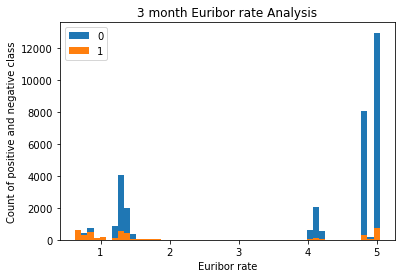

In [55]:
plt.hist(bank_af.groupby("y").get_group(0)['euribor3m'], bins=50, label= '0')
plt.hist(bank_af.groupby("y").get_group(1)['euribor3m'], bins=50, label='1')
plt.title('3 month Euribor rate Analysis')
plt.xlabel('Euribor rate')
plt.ylabel('Count of positive and negative class')
plt.legend();

The above graph shows the clients were contacted the most with the 3 month Euribor rate was between 1 -2 and 4-5.

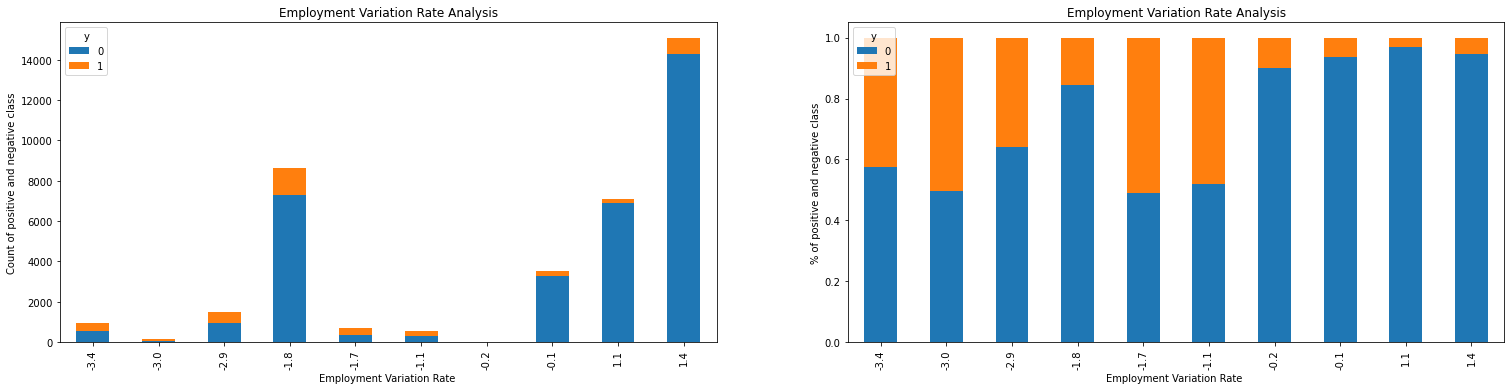

In [56]:
ax= plt.subplot(331)
pd.crosstab(bank_af['emp.var.rate'], bank_af.y).plot(kind='bar', ax=ax,figsize=(40,20),stacked=True)
plt.title('Employment Variation Rate Analysis')
plt.xlabel('Employment Variation Rate ')
plt.ylabel('Count of positive and negative class')

ax=plt.subplot(332)
pd.crosstab(bank_af['emp.var.rate'], bank_af.y,normalize='index').plot(kind='bar', ax=ax,figsize=(40,20),stacked=True)
plt.title('Employment Variation Rate Analysis')
plt.xlabel('Employment Variation Rate ')
plt.ylabel('% of positive and negative class');

The above count of classes bar graph shows that for the clients were contacted when the employment variation rate is -.1.8 and increases when the rate increases from -0.1 to 1.4.

The percentage of classes bar graph shows a counterintuitive trend where the likelihood that the client would purchase decreases as the the employment variation rate increases.

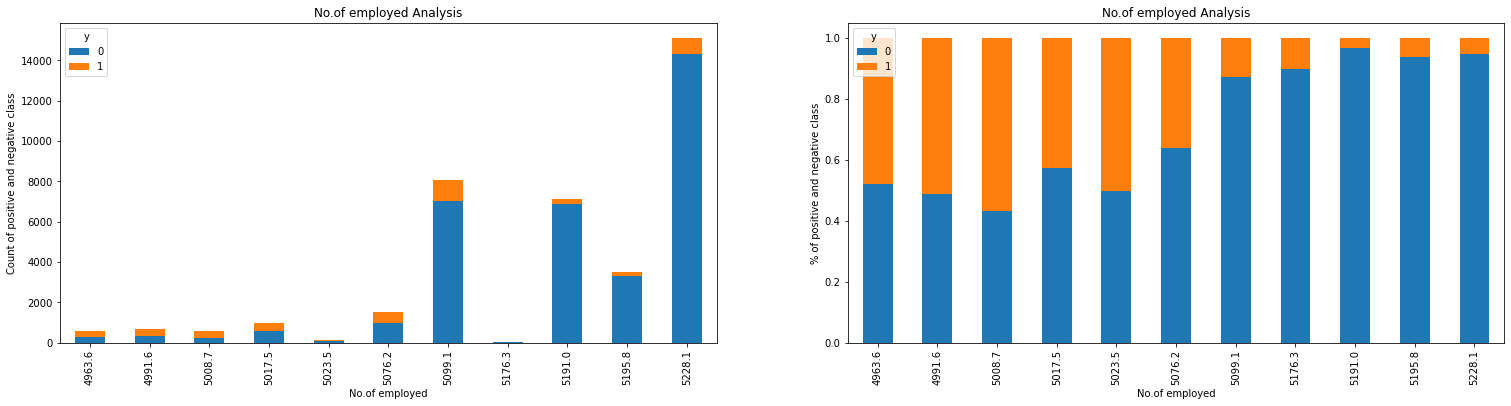

In [57]:
ax= plt.subplot(331)
pd.crosstab(bank_af['nr.employed'], bank_af.y).plot(kind='bar', ax=ax,figsize=(40,20),stacked=True)
plt.title('No.of employed Analysis')
plt.xlabel('No.of employed')
plt.ylabel('Count of positive and negative class')

ax=plt.subplot(332)
pd.crosstab(bank_af['nr.employed'], bank_af.y,normalize='index').plot(kind='bar', ax=ax,figsize=(40,20),stacked=True)
plt.title('No.of employed Analysis')
plt.xlabel('No.of employed')
plt.ylabel('% of positive and negative class');

The above count of classes bar graph shows that for the clients were contacted when the number of employed is 5099.1 and increases when the number of employed increases from 5191 to 5228.1.

The percentage of classes bar graph shows a similar counterintuitive trend to the employment variate rate where the likelihood that the client would purchase decreases as the the number of employed increases.

### 3.5 Correlated Variables

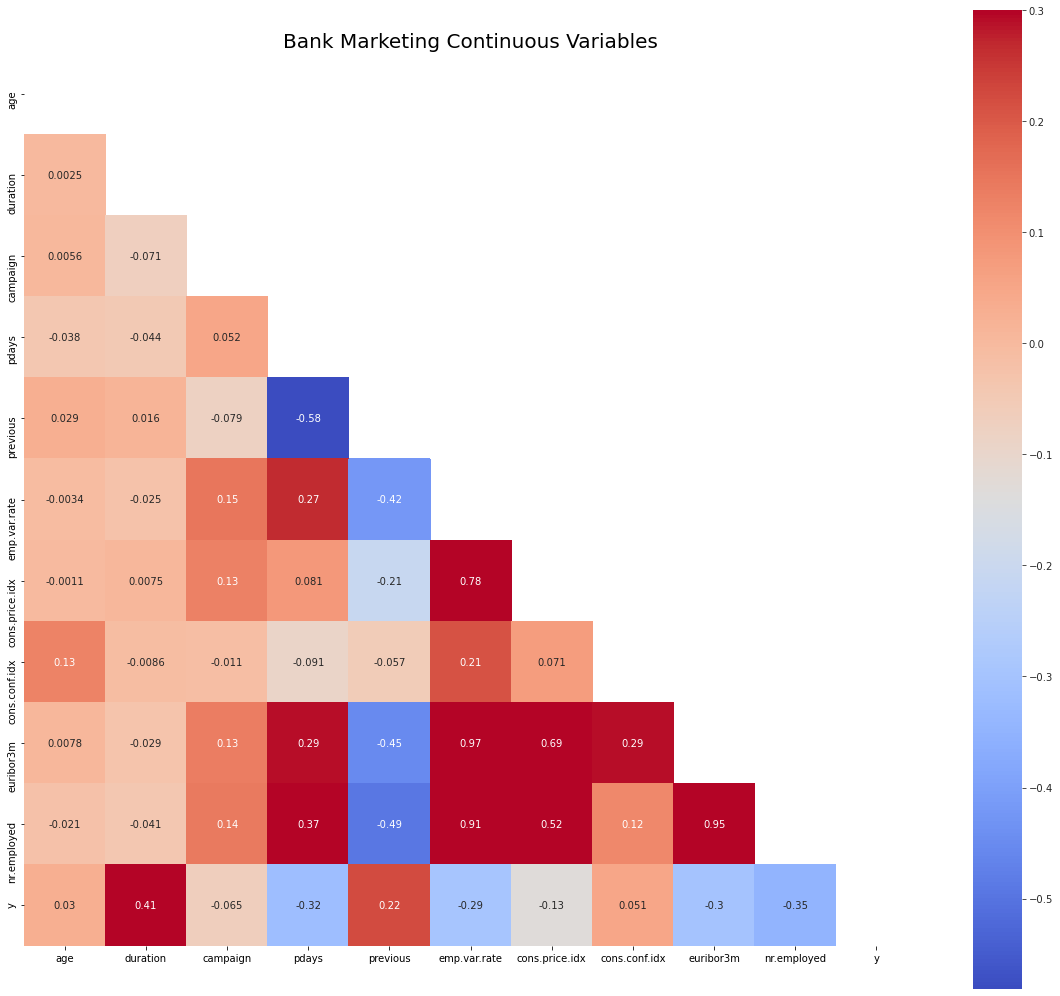

In [58]:
plt.figure(figsize=(20,18))
mask = np.zeros_like(bank_af.corr())
mask[np.triu_indices_from(mask)] = True
plt.title('Bank Marketing Continuous Variables', fontsize=20)
with sns.axes_style("white"):
    sns.heatmap((bank_af.corr()), mask=mask, vmax=.3, square=True, annot=True, cmap="coolwarm",annot_kws={'size':10})

As seen in the heatmap, there are several features that are highly correlated. Some of the collinear features should be removed to reduce the dimensionality of our final model. These will cause some variance in the data to lose, but it will also make our model more generalized for future use on unseen data.

In [59]:
# Loop to remove any collinear variable
correlated_features = set()

for i in range(len(bank_af.corr().columns)):
    for j in range(i):
        if abs(bank_af.corr().iloc[i, j]) > 0.9:
            colname = bank_af.corr().columns[i]
            correlated_features.add(colname)

print("Collinear Columns to drop: ", correlated_features)

Collinear Columns to drop:  {'nr.employed', 'euribor3m'}


## 4. More Data Cleaning

In [60]:
## Dropping outliers

In [61]:
len(bank_af[bank_af.campaign >=6])

3131

In [62]:
bank_af=bank_af[bank_af.campaign <=6] 

In [63]:
len(bank_af[bank_af.previous >=2])

935

In [64]:
bank_af=bank_af[bank_af.previous <=2] 

In [65]:
len(bank_af[bank_af.age >=70] )

377

In [66]:
bank_af=bank_af[bank_af.age <=70] 

In [67]:
len(bank_af[bank_af.duration >=645])

2578

In [68]:
bank_af=bank_af[bank_af.duration <=645]

In [69]:
bank_af.shape

(32835, 21)

## 5. Data Labelling

In [70]:
# Function for labelelling 2 min intervals to duration

def duration_calc(df):
    if 0 <= df <= 120:
        return '0-2 mins'
    elif 120 < df <= 240:
        return '2-4 mins'
    elif 240 < df <= 360:
        return '4-6 mins'
    elif 360 < df <= 480:
        return '6-8 mins'
    elif 480 < df <= 600:
        return '8-10 mins'
    elif 600 < df <= 720:
        return '10-12 mins'
    else:
        return 'more than 12 mins'


In [71]:
bank_af['duration'] = bank_af['duration'].apply(duration_calc)

In [72]:
#Checking the results
bank_af['duration'].unique()

array(['4-6 mins', '2-4 mins', '6-8 mins', '0-2 mins', '8-10 mins',
       '10-12 mins'], dtype=object)

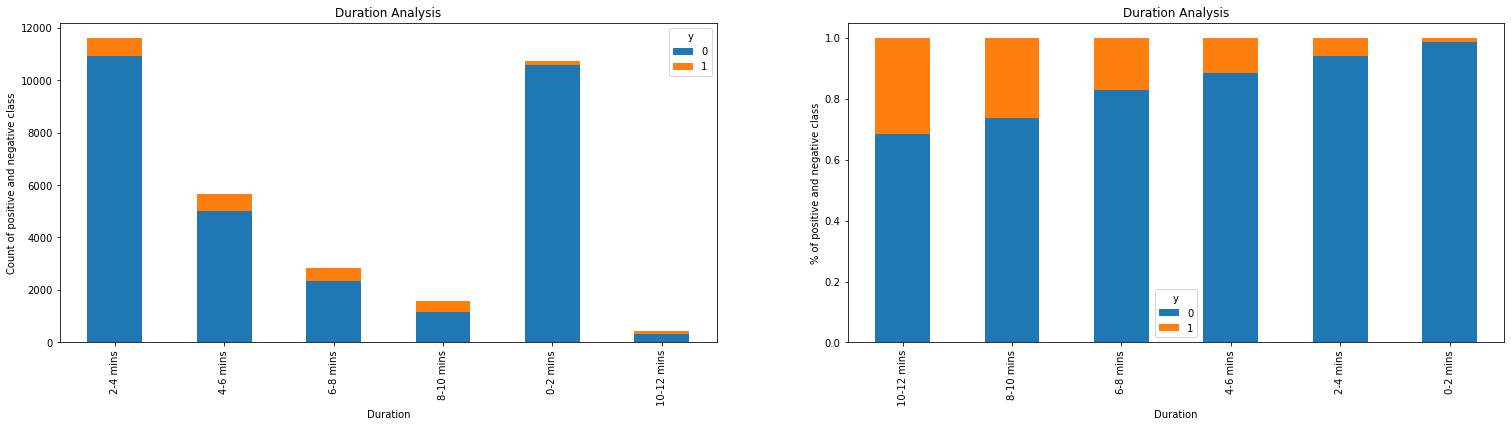

In [73]:
ax= plt.subplot(331)
pd.crosstab(bank_af['duration'], bank_af.y).sort_values(by=1,ascending=False).plot(kind='bar', ax=ax,figsize=(40,20),stacked=True)
plt.title('Duration Analysis')
plt.xlabel('Duration')
plt.ylabel('Count of positive and negative class')

ax=plt.subplot(332)
pd.crosstab(bank_af['duration'], bank_af.y,normalize='index').sort_values(by=1,ascending=False).plot(kind='bar', ax=ax,figsize=(40,20),stacked=True)
plt.title('Duration Analysis')
plt.xlabel('Duration')
plt.ylabel('% of positive and negative class');

Further analysis shows that the longer the call the more likely the client would purchase the product. This makes sense as longer call would be needed to explain the product and persuade the client. However the low numbers of long calls may show that clients do not wish to have too long conversations.

In [74]:
# Function label 3 day intervals to pdays and 
def pdays_calc(df):
    if 0 <= df <= 3:
        return '3 days or less'
    elif 3 < df <= 6:
        return '3 -6 days'
    elif 6 < df <= 9:
        return '6 -9 days'
    elif 9 < df <= 12:
        return '9 -12 days'
    elif 2 < df <= 15:
        return '12 -15 days'
    elif 15< df <= 18:
        return '15 -18 days'
    elif 18 < df <= 21:
        return '18 -21 days'
    elif 21 < df <= 27:
        return '21 -27 days'
    else:
        return 'new clients'             

In [75]:
bank_af['pdays'] = bank_af['pdays'].apply(pdays_calc)

In [76]:
#Checking the results
bank_af['pdays'].unique()

array(['new clients', '3 -6 days', '3 days or less', '9 -12 days',
       '6 -9 days', '12 -15 days', '15 -18 days', '18 -21 days',
       '21 -27 days'], dtype=object)

## 6  Feature Selection

In [77]:
#Dropping collinear features n.employed and euribor3m

bank_af = bank_af.drop(correlated_features, axis=1)

In [78]:
#Checking the results

bank_af.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'y'],
      dtype='object')

## 7 Data Encoding

In [79]:
categ = bank_af.select_dtypes(include=['object'])
categ.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'pdays', 'poutcome'],
      dtype='object')

In [80]:
# Dummy encoding of categorical data
bank_af=pd.get_dummies(bank_af, columns =['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'pdays', 'poutcome'], drop_first = True)

In [81]:
# Export the cleaned and engineered dataset to CSV
bank_af.to_csv('../dataset/bank_af_final.csv', index=False)
